In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,3.0,0.0,"O'Donoghue, Ms. Bridget",female,NaN,0.0,0.0,364856,7.750,NaN,Q,NaN,NaN,NaN
1,2.0,0.0,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0.0,0.0,250655,26.000,NaN,S,NaN,NaN,NaN
2,2.0,1.0,"Smith, Miss. Marion Elsie",female,40.0,0.0,0.0,31418,13.000,NaN,S,9,NaN,NaN
3,3.0,1.0,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.0,1.0,1.0,363291,20.525,NaN,S,C D,NaN,"Strood, Kent, England Detroit, MI"
4,3.0,1.0,"McCoy, Miss. Agnes",female,NaN,2.0,0.0,367226,23.250,NaN,Q,16,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1009 non-null   float64
 1   survived   1009 non-null   float64
 2   name       1009 non-null   object 
 3   sex        1009 non-null   object 
 4   age        812 non-null    float64
 5   sibsp      1009 non-null   float64
 6   parch      1009 non-null   float64
 7   ticket     1009 non-null   object 
 8   fare       1008 non-null   float64
 9   cabin      229 non-null    object 
 10  embarked   1008 non-null   object 
 11  boat       374 non-null    object 
 12  body       98 non-null     float64
 13  home.dest  582 non-null    object 
dtypes: float64(7), object(7)
memory usage: 110.5+ KB


In [4]:
print(data.shape,test.shape)

(1009, 14) (300, 13)


In [5]:
print(data.columns)
test.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')


Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [6]:
columns_to_drop = ['name','ticket','cabin','embarked','boat','body','home.dest']
data_clean = data.drop(columns=columns_to_drop,axis=1)
test_clean = test.drop(columns=columns_to_drop,axis=1)

In [7]:
data_clean.shape,test_clean.shape

((1009, 7), (300, 6))

In [8]:
data_clean.head()

,pclass,survived,sex,age,sibsp,parch,fare
0,3.0,0.0,female,NaN,0.0,0.0,7.750
1,2.0,0.0,male,39.0,0.0,0.0,26.000
2,2.0,1.0,female,40.0,0.0,0.0,13.000
3,3.0,1.0,female,31.0,1.0,1.0,20.525
4,3.0,1.0,female,NaN,2.0,0.0,23.250


In [9]:
test_clean.head()

,pclass,sex,age,sibsp,parch,fare
0,1.0,male,36.0,0.0,0.0,26.3875
1,3.0,female,NaN,8.0,2.0,69.5500
2,1.0,male,NaN,0.0,0.0,50.0000
3,2.0,male,34.0,0.0,0.0,13.0000
4,2.0,male,28.0,0.0,0.0,13.0000


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()
data_clean['sex'] = le.fit_transform(data_clean['sex'])
test_clean['sex'] = le.fit_transform(test_clean['sex'])


In [12]:
test_clean['sex']

0      1
1      0
2      1
3      1
4      1
      ..
295    0
296    0
297    1
298    1
299    0
Name: sex, Length: 300, dtype: int32

In [13]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1009 non-null   float64
 1   survived  1009 non-null   float64
 2   sex       1009 non-null   int32  
 3   age       812 non-null    float64
 4   sibsp     1009 non-null   float64
 5   parch     1009 non-null   float64
 6   fare      1008 non-null   float64
dtypes: float64(6), int32(1)
memory usage: 51.4 KB


In [14]:
data_clean['age'] = data_clean['age'].fillna(data_clean['age'].mean())
test_clean['age'] = test_clean['age'].fillna(test_clean['age'].mean())

In [15]:
data_clean['fare'] = data_clean['fare'].fillna(data_clean['fare'].mean())

In [16]:
print(data_clean.info())
print(test_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1009 non-null   float64
 1   survived  1009 non-null   float64
 2   sex       1009 non-null   int32  
 3   age       1009 non-null   float64
 4   sibsp     1009 non-null   float64
 5   parch     1009 non-null   float64
 6   fare      1009 non-null   float64
dtypes: float64(6), int32(1)
memory usage: 51.4 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  300 non-null    float64
 1   sex     300 non-null    int32  
 2   age     300 non-null    float64
 3   sibsp   300 non-null    float64
 4   parch   300 non-null    float64
 5   fare    300 non-null    float64
dtypes: float64(5), int32(1)
memory usage: 13.0 KB
None


In [17]:
 data_clean.iloc[0]

pclass       3.000000
survived     0.000000
sex          0.000000
age         29.838978
sibsp        0.000000
parch        0.000000
fare         7.750000
Name: 0, dtype: float64

In [18]:
input_cols = ['pclass','sex', 'age', 'sibsp', 'parch', 'fare']
output_cols = ['survived']
X = data_clean[input_cols]
y = data_clean[output_cols]

In [19]:
y.columns
print(X.shape,y.shape)

(1009, 6) (1009, 1)


In [20]:
def entropy(col):
    counts = np.unique(col,return_counts=True)
    N = float(col.shape[0])
#     print(counts)
    entropy = 0.0
    for ix in counts[1]:
        p = ix/N
        entropy += (-1.0*p*(np.log2(p)))
        
    return entropy

In [21]:
col = np.array([1,1,0,0])
entropy(col)

1.0

In [22]:
col = np.array([1,1,1,1,0,0,0,0,0])
entropy(col)

0.9910760598382222

In [23]:
counts = np.unique(col,return_counts=True)
print(counts)

(array([0, 1]), array([5, 4], dtype=int64))


In [24]:
counts[1][0]

5

In [25]:
x = pd.DataFrame([],columns=['0','1'])
x

,0,1


In [26]:
data_clean['sex'].loc[1003]
data_clean.iloc[[0,2,10] , 3:4]

,age
0,29.838978
2,40.000000
10,21.000000


In [27]:
data_clean.loc[[0,2,10],'age']

0     29.838978
2     40.000000
10    21.000000
Name: age, dtype: float64

In [28]:
def divide(x_data,fkey,fval):
    x_right = pd.DataFrame([],columns=x_data.columns)
    x_left = pd.DataFrame([],columns=x_data.columns)
    
    for ix in range(x_data.shape[0]):
        val = x_data[fkey].loc[ix]
        
        if val > fval:
            x_right = x_right.append(x_data.loc[ix])
        else:
            x_left = x_left.append(x_data.loc[ix])
    return x_left,x_right
    

In [29]:
x_left,x_right = divide(data_clean[:10],'sex',0.5)
print(x_left)
print(x_right)

   pclass  survived  sex        age  sibsp  parch     fare
0     3.0       0.0  0.0  29.838978    0.0    0.0   7.7500
2     2.0       1.0  0.0  40.000000    0.0    0.0  13.0000
3     3.0       1.0  0.0  31.000000    1.0    1.0  20.5250
4     3.0       1.0  0.0  29.838978    2.0    0.0  23.2500
7     1.0       1.0  0.0  49.000000    0.0    0.0  25.9292
   pclass  survived  sex        age  sibsp  parch     fare
1     2.0       0.0  1.0  39.000000    0.0    0.0  26.0000
5     2.0       0.0  1.0  16.000000    0.0    0.0  26.0000
6     2.0       0.0  1.0  43.000000    0.0    1.0  21.0000
8     1.0       0.0  1.0  48.000000    0.0    0.0  50.4958
9     2.0       0.0  1.0  29.838978    0.0    0.0  12.8750


In [30]:
def information_gain(x_data,fkey,fval):
    left,right = divide(x_data,fkey,fval)
    l = float(left.shape[0])/x_data.shape[0]
    r = float(right.shape[0])/x_data.shape[0]
    
    if left.shape[0] == 0 or right.shape[0] == 0:
        return -1000000 #min information gain
    
    i_gain = entropy(data_clean.survived) - (l*entropy(left.survived) + r*entropy(right.survived))
    return i_gain

In [31]:
for fx in X.columns:
    print(fx)
    print(information_gain(data_clean,fx,data_clean[fx].mean()))

pclass
0.055456910002982474
sex
0.19274737190850932
age
0.0010525742338489685
sibsp
0.006492394392888956
parch
0.01975608012294816
fare
0.04242793401428169


In [32]:
class DecisionTree:
    
    def __init__(self,depth=0,max_depth=5):
        self.left = None
        self.right = None
        self.fkey = None
        self.fval = None
        self.max_depth = max_depth
        self.depth = depth
        self.target = None
        
    def train(self,X_train):
        
        features = ['pclass','sex', 'age', 'sibsp', 'parch', 'fare']
        info_gains = []
        
        for ix in features:
            i_gain = information_gain(X_train,ix,X_train[ix].mean())
            info_gains.append(i_gain)
            
        self.fkey = features[np.argmax(info_gains)] 
        self.fval = X_train[self.fkey].mean()
        
        print('making tree feature is ',self.fkey)
        
        data_left,data_right = divide(X_train,self.fkey,self.fval)
        
        data_left = data_left.reset_index(drop=True)
        
        data_right = data_right.reset_index(drop=True)
        
        #truly leaf node
        if data_left.shape[0]==0 or data_right.shape[0]==0:
            if X_train.survived.mean() >= 0.5:
                self.target = "survived"
            else:
                self.target = "dead"
            return
        
        #Stop early when depth>= max_depth
        if(self.depth>=self.max_depth):
            if X_train.survived.mean() >= 0.5:
                self.target = "survived"
            else:
                self.target = "dead"
            return
        
        #recursive case
        self.left = DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.left.train(data_left)
        
        self.right = DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.right.train(data_right)
        
        #set the target value at every node
        if X_train.survived.mean() >= 0.5:
            self.target = "survived"
        else:
            self.target = "dead"
        return
    
    def predict(self,test):
        if test[self.fkey]>self.fval:
            if self.right is None:
                return self.target
            return self.right.predict(test)
        else:
            if self.left is None:
                return self.target
            return self.left.predict(test)

In [33]:
d = DecisionTree()  
d.train(data_clean)

making tree feature is  sex
making tree feature is  pclass
making tree feature is  pclass
making tree feature is  fare
making tree feature is  sibsp
making tree feature is  age
making tree feature is  age
making tree feature is  sibsp
making tree feature is  age
making tree feature is  sibsp
making tree feature is  parch
making tree feature is  fare
making tree feature is  sibsp
making tree feature is  fare
making tree feature is  age
making tree feature is  age
making tree feature is  parch
making tree feature is  parch
making tree feature is  sibsp
making tree feature is  fare
making tree feature is  fare
making tree feature is  fare
making tree feature is  age
making tree feature is  sibsp
making tree feature is  sibsp
making tree feature is  fare
making tree feature is  fare
making tree feature is  age
making tree feature is  fare
making tree feature is  fare
making tree feature is  fare
making tree feature is  age
making tree feature is  fare
making tree feature is  parch
making t

## Train-Validation-test set split

In [34]:
split = int(0.7*data_clean.shape[0])
train_data = data_clean[:split]
test_data = data_clean[split:]
test_data = test_data.reset_index(drop=True)

In [35]:
print(train_data.shape,test_data.shape)

(706, 7) (303, 7)


In [36]:
dt = DecisionTree()
dt.train(train_data)

making tree feature is  sex
making tree feature is  pclass
making tree feature is  parch
making tree feature is  fare
making tree feature is  fare
making tree feature is  fare
making tree feature is  fare
making tree feature is  age
making tree feature is  age
making tree feature is  age
making tree feature is  fare
making tree feature is  pclass
making tree feature is  age
making tree feature is  age
making tree feature is  age
making tree feature is  age
making tree feature is  age
making tree feature is  sibsp
making tree feature is  fare
making tree feature is  fare
making tree feature is  parch
making tree feature is  age
making tree feature is  age
making tree feature is  age
making tree feature is  parch
making tree feature is  fare
making tree feature is  parch
making tree feature is  age
making tree feature is  fare
making tree feature is  fare
making tree feature is  age
making tree feature is  age
making tree feature is  fare
making tree feature is  parch
making tree feature

In [37]:
print(dt.fkey)
print(dt.fval)

sex
0.6543909348441926


In [38]:
print(dt.left.fkey)
print(dt.right.fkey)

pclass
fare


In [39]:
y_ = []
for ix in range(test_data.shape[0]):
    y_.append(dt.predict(test_data.loc[ix]))

In [40]:
y_

['dead',
 'survived',
 'dead',
 'dead',
 'dead',
 'dead',
 'survived',
 'survived',
 'dead',
 'dead',
 'dead',
 'dead',
 'survived',
 'dead',
 'dead',
 'dead',
 'survived',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'survived',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'survived',
 'survived',
 'dead',
 'survived',
 'dead',
 'dead',
 'dead',
 'dead',
 'survived',
 'survived',
 'dead',
 'survived',
 'survived',
 'dead',
 'survived',
 'survived',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'survived',
 'dead',
 'dead',
 'dead',
 'dead',
 'survived',
 'survived',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'survived',
 'survived',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'survived',
 'dead',
 'dead',
 'dead',
 'survived',
 'survived',
 'dead',
 'dead',
 'survived',
 'survived',
 'survived',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'survived',
 'survived',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'surv

In [41]:
y_actual = test_data[output_cols]
y_actual

,survived
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
298,1.0
299,0.0
300,1.0
301,1.0


In [42]:
y_ = le.fit_transform(y_)

In [43]:
print(y_.shape)
y_actual.shape

(303,)


(303, 1)

In [44]:
y_ = np.array(y_).reshape((-1,1))

In [45]:
y_.shape

(303, 1)

In [46]:
acc = np.sum(np.array(y_) == np.array(y_actual))/y_.shape[0]

In [47]:
acc

0.7557755775577558

## Decision Tree using Sklearn

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
sk_tree = DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [50]:
sk_tree.fit(train_data[input_cols],train_data[output_cols])

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [51]:
sk_tree.predict(test_data[input_cols])

array([0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 0., 1.

In [52]:
sk_tree.score(test_data[input_cols],test_data[output_cols])

0.7953795379537953

## Visualization a Decision Tree

In [53]:
import pydotplus

from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

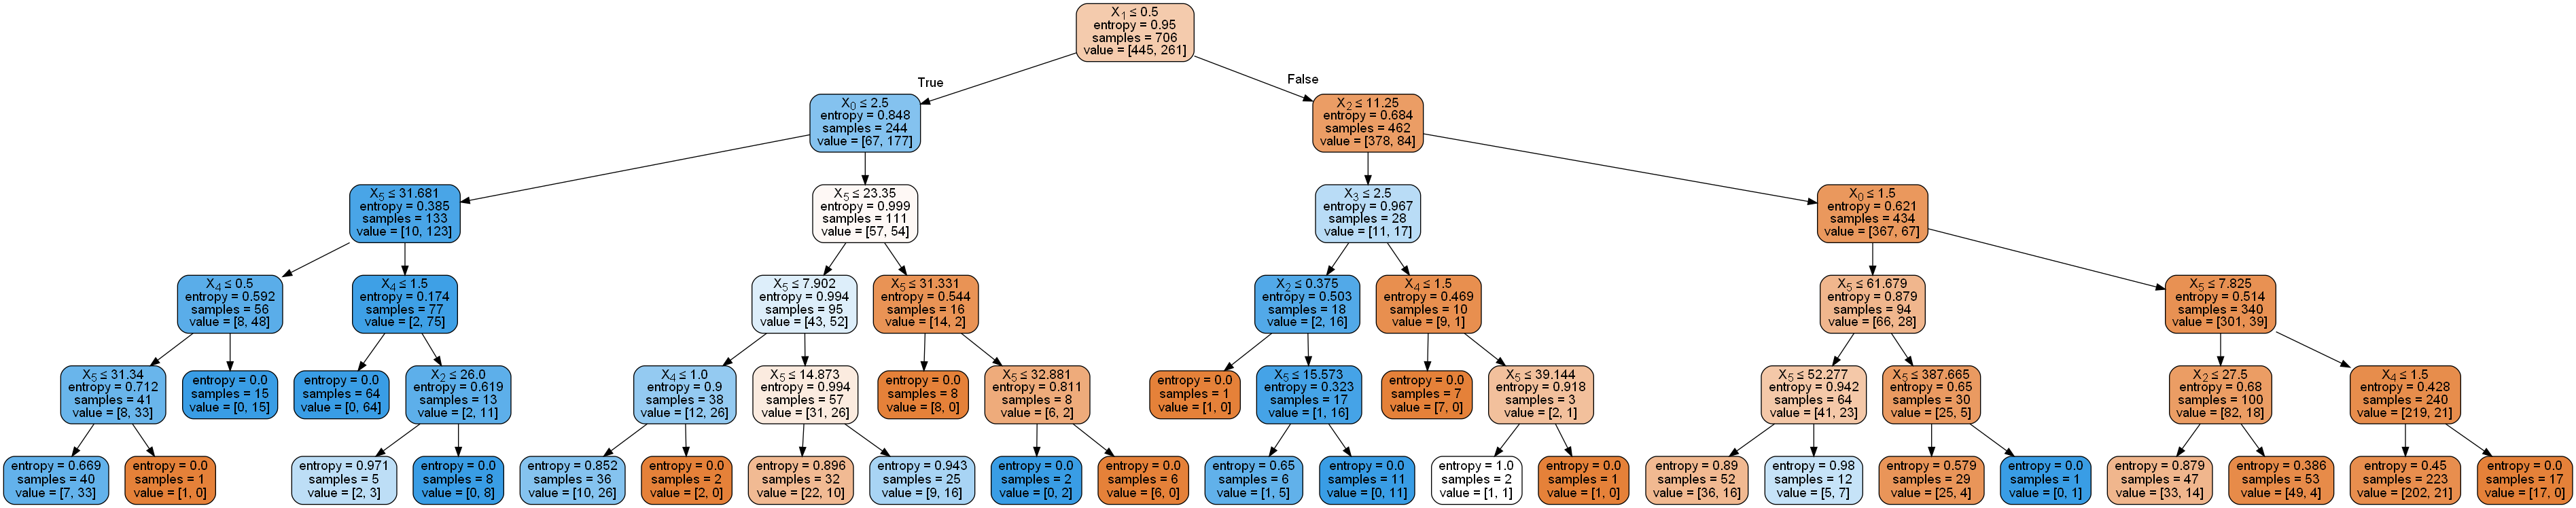

In [54]:
dot_data = StringIO()
export_graphviz(sk_tree, out_file=dot_data, filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Random Forest Implementation

In [55]:
X_train = train_data[input_cols]
Y_train = np.array(train_data[output_cols]).reshape((-1,1))
X_test = test_data[input_cols]
Y_test = np.array(test_data[output_cols]).reshape((-1,1))

In [58]:
sk_tree = DecisionTreeClassifier(criterion='entropy')

In [59]:
sk_tree.fit(X_train,Y_train)
sk_tree.score(X_train,Y_train)

0.9773371104815864

In [61]:
sk_tree.score(X_test,Y_test)

0.7524752475247525

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
rf = RandomForestClassifier(n_estimators=10,criterion='entropy',max_depth=4)

In [94]:
rf.fit(X_train,Y_train)

<ipython-input-94-70917fd5b97b>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,Y_train)


RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=10)

In [95]:
rf.score(X_train,Y_train)

0.8158640226628895

In [96]:
rf.score(X_test,Y_test)

0.7788778877887789

In [99]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(RandomForestClassifier(n_estimators=20,max_depth=5,criterion='entropy'),X_train,Y_train,cv=5).mean()

D:\MiniConda\Data_Science_and_machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\MiniConda\Data_Science_and_machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\MiniConda\Data_Science_and_machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\MiniConda\Data_Science_and_machine_learning\env\l

In [100]:
print(acc)

0.8116571771051841


In [101]:
acc_list = []
for i in range(1,50):
    acc = cross_val_score(RandomForestClassifier(n_estimators=i,max_depth=5,criterion='entropy'),X_train,Y_train,cv=5).mean()
    acc_list.append(acc)
print(acc_list)

D:\MiniConda\Data_Science_and_machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\MiniConda\Data_Science_and_machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\MiniConda\Data_Science_and_machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\MiniConda\Data_Science_and_machine_learning\env\l

D:\MiniConda\Data_Science_and_machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\MiniConda\Data_Science_and_machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\MiniConda\Data_Science_and_machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\MiniConda\Data_Science_and_machine_learning\env\l

D:\MiniConda\Data_Science_and_machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\MiniConda\Data_Science_and_machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\MiniConda\Data_Science_and_machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\MiniConda\Data_Science_and_machine_learning\env\l

D:\MiniConda\Data_Science_and_machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\MiniConda\Data_Science_and_machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\MiniConda\Data_Science_and_machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\MiniConda\Data_Science_and_machine_learning\env\l

D:\MiniConda\Data_Science_and_machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\MiniConda\Data_Science_and_machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\MiniConda\Data_Science_and_machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\MiniConda\Data_Science_and_machine_learning\env\l

D:\MiniConda\Data_Science_and_machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\MiniConda\Data_Science_and_machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\MiniConda\Data_Science_and_machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\MiniConda\Data_Science_and_machine_learning\env\l

D:\MiniConda\Data_Science_and_machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\MiniConda\Data_Science_and_machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\MiniConda\Data_Science_and_machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\MiniConda\Data_Science_and_machine_learning\env\l

D:\MiniConda\Data_Science_and_machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\MiniConda\Data_Science_and_machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\MiniConda\Data_Science_and_machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\MiniConda\Data_Science_and_machine_learning\env\l

D:\MiniConda\Data_Science_and_machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\MiniConda\Data_Science_and_machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\MiniConda\Data_Science_and_machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\MiniConda\Data_Science_and_machine_learning\env\l

D:\MiniConda\Data_Science_and_machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\MiniConda\Data_Science_and_machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\MiniConda\Data_Science_and_machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\MiniConda\Data_Science_and_machine_learning\env\l

[0.754989511537309, 0.7946858455698732, 0.791818999100989, 0.7890520427529717, 0.7861052841873939, 0.7974627909299771, 0.8002796923384278, 0.8017181100789132, 0.8017280990909998, 0.8017280990909998, 0.8074218359804217, 0.8187194086504845, 0.8173209469583457, 0.8031465388073119, 0.800269703326341, 0.8031265607831385, 0.8130756168214963, 0.8159124962541204, 0.8229847168115073, 0.8073818799320748, 0.8102287483767855, 0.8130756168214963, 0.8144740785136351, 0.8144740785136351, 0.8074218359804215, 0.815892518229947, 0.8130656278094097, 0.8173209469583458, 0.805983418239936, 0.8088402756967336, 0.8031465388073119, 0.8201478373788833, 0.805983418239936, 0.8144840675257218, 0.8159224852662073, 0.8173209469583457, 0.8144840675257216, 0.825831585256218, 0.8087903306363001, 0.8158925182299471, 0.8130556387973229, 0.8158825292178603, 0.8116571771051841, 0.8144840675257216, 0.8102387373888723, 0.8144740785136351, 0.8088202976725603, 0.8130556387973229, 0.8159124962541204]


In [102]:
acc_list = np.array(acc_list)
np.argmax(acc_list)

37

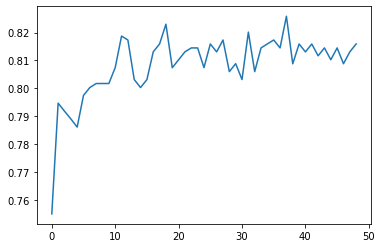

In [103]:
plt.plot(acc_list)
plt.show()

In [104]:
rf = RandomForestClassifier(n_estimators=37,criterion='entropy',max_depth=4)

In [106]:
rf.fit(X_train,Y_train)

<ipython-input-106-70917fd5b97b>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,Y_train)


RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=37)

In [107]:
rf.score(X_train,Y_train)

0.839943342776204

In [108]:
rf.score(X_test,Y_test)

0.7755775577557755